In [1]:
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

import jax

from src.simulate_trace import MakeTrace, apply_noise, GaussianAmplitude, PolynomialPhase, MultiPulse, RandomPhase

In [2]:
# idea: implementation of true doubleblind algorithm -> merge two traces along m 
#   -> problem: nonlinear_method depends on m then (can be handled)
#   -> but what about different scales of traces -> there may be a different background -> sharp edges along m
#       -> might be an issue. But maybe its irrelevant since its along m and not n.
#           -> it will only possibly work with GP and COPRA -> other solvers rely on absolute scale for optimization

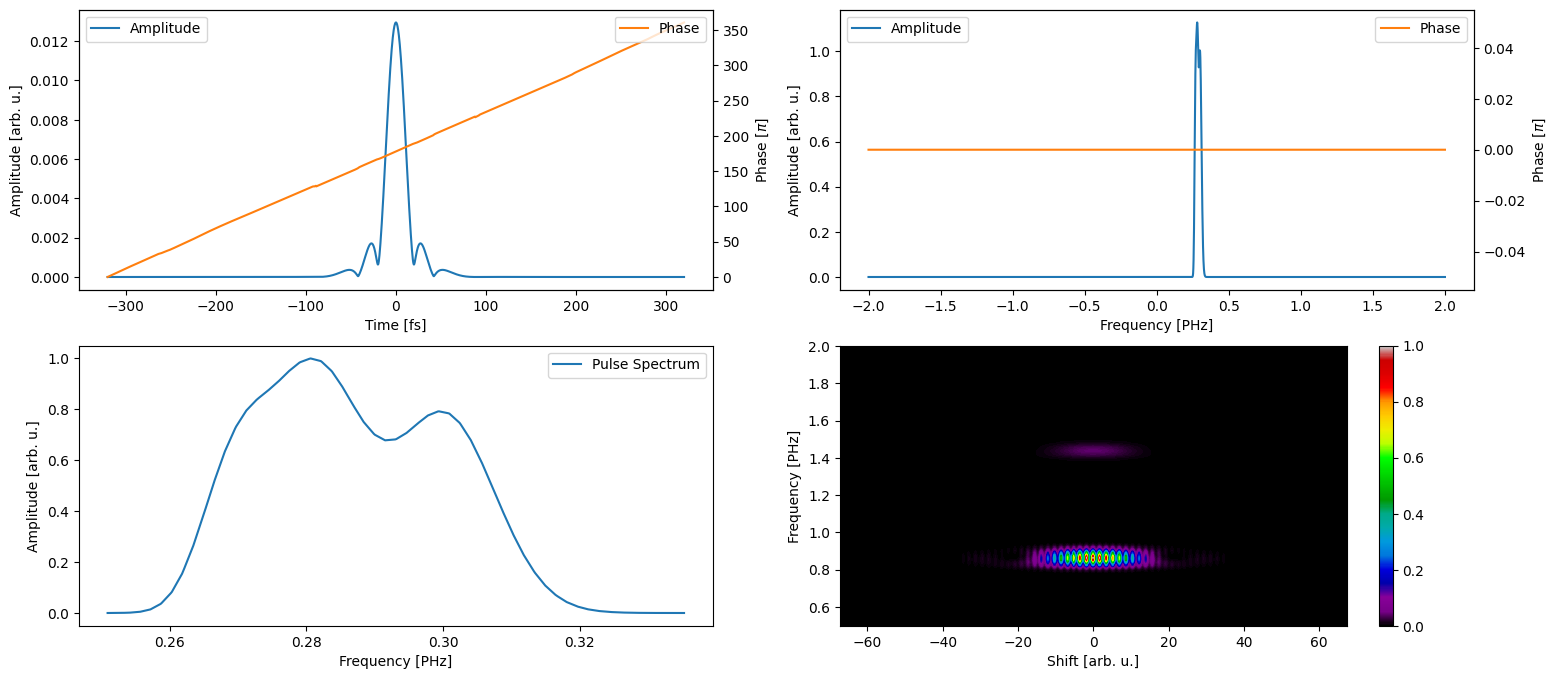

In [14]:
pulse_maker = MakeTrace(N=128*20, Delta_f=2)

phase = PolynomialPhase(0.3, (0,0,0,0))
amp = GaussianAmplitude((1,1), (0.275,0.3), (0.025,0.025), (1.5,1))
time_inp, pulse_t_inp, frequency_inp, pulse_f_inp = pulse_maker.generate_pulse((amp, phase))


input_pulses = pulse_maker.pulses


phase = PolynomialPhase(0.3, (0,0,0,0))
amp = GaussianAmplitude((0.1,1), (0.225,0.2), (0.01,0.025), (1,1))
_, _, frequency_gate, pulse_f_gate = pulse_maker.generate_pulse((amp, phase))


delay, frequency, trace, spectra=pulse_maker.generate_frog(time_inp, frequency_inp, pulse_t_inp, pulse_f_inp, "5hg", cross_correlation=False, interferometric=False,
                                                          gate=(frequency_gate, pulse_f_gate), real_fields=True, interpolate_fft_conform=False,
                                                          N=128*4, scale_time_range=1, plot_stuff=True, cut_off_val=0.0001, frequency_range=(0.5,2))

In [27]:
vars(pulse_maker).keys()

dict_keys(['N', 'Delta_f', 'maketrace', 'frequency', 'df', 'time', 'sk', 'rn', 'pulses'])

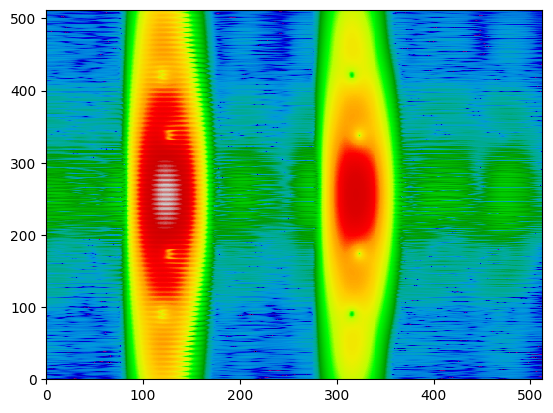

In [20]:
plt.pcolormesh(jnp.log(trace), cmap="nipy_spectral")
